## Loan Application Status Prediction

#### Project Description


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# check for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.isnull().sum().sum()

149

There are 149 null values present in the dataset.

In [7]:
# check for duplicate rows
df.duplicated().sum()

0

No duplicate rows present in the dataset.

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# checking info and if anything unusual present.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Everything looking good.

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observing mean, std, quartiles and max values there are outliers and skewness in the dataset.

In [11]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [12]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
target='Loan_Status'

#### separating categorical and continuous variables

In [15]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Loan_ID as we can see is a column just for identification of loan applicants. It is not much of an use for analysis or model training. We can delete it.

In [16]:
df=df.drop("Loan_ID", axis=1)
df.shape

(614, 12)

In [17]:
# continuous variables
con=df.select_dtypes(include= 'number').columns
con

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [18]:
# categorical columns
cat=df.select_dtypes(exclude= 'number').columns
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

'Credit_History' column

In [19]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

We can see that this column contains only 2 unique values namely (1.0 and 0.0) which is indicates that if 1.0, the applicant do have a credit history and No history for 0.0.

Hence, we can conclude that this column holds categories.

we need to change the datatype to int after filling null values for more clear understanding.

#### Null values

In [20]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# get index of rows with null values.
ind=[]
for i in df:
    ind.append(df.loc[pd.isnull(df[i])].index.tolist())
    
no=[j for i in range (len(ind)) for j in ind[i]]    #getting all elements from nested 'ind' list

# there are possibilities that several indexes are repeated in the list. we will use set to get unique indices.
len(set(no))

134

There are 134 rows in which null value are present. As the count of rows is huge we can't afford to delete them.

In [22]:
df[cat].isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [23]:
df[con].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

We will fill the null values of categorical column with most occuring category.

For numerical columns other than Credit_History, we need to find out the best way to fill the null values from Mean or Median.

As we already know Credit_History holds values that are categories we will use mode to fill its null value.

1) Numerical columns

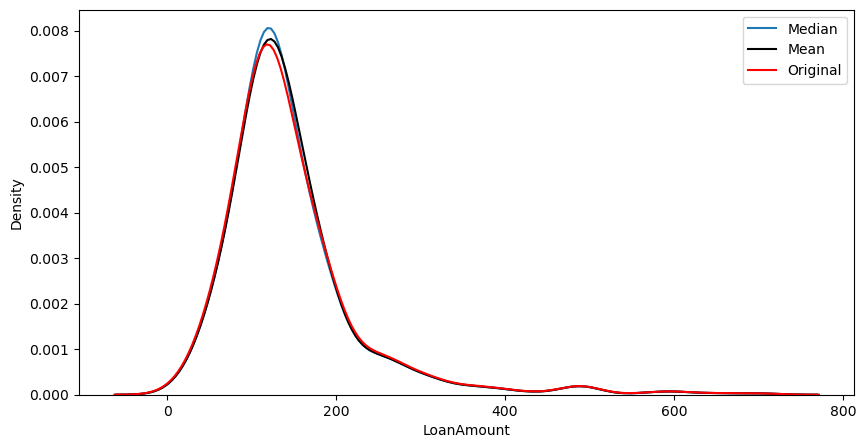

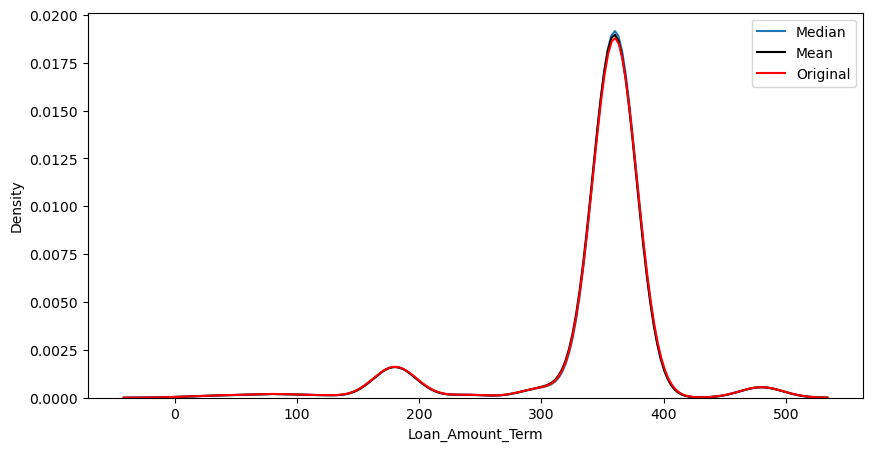

In [24]:
for i in ['LoanAmount','Loan_Amount_Term']:
    med= df[i].fillna(df[i].median())
    avg= df[i].fillna(df[i].mean())
    
    plt.figure(figsize=(10,5))
    sns.distplot(med, hist=False )
    sns.distplot(avg, hist=False, color='Black' )
    sns.distplot(df[i], hist=False, color='red')
    plt.legend(['Median', 'Mean', 'Original'])

We can see, both the graphs represent that filling null values with mean is better way to fill null values. It adds little disturbance to the original graph as compared to median.

Filling null values

In [25]:
for i in ['LoanAmount','Loan_Amount_Term']:
    df[i]= df[i].fillna(df[i].mean())

In [26]:
# Credit_History
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

2. Categorical column

In [27]:
for i in cat:
    df[i]= df[i].fillna(df[i].mode()[0])

In [28]:
df.isnull().sum().sum()

0

Null values filled

#### More on understanding columns

In [29]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Credit_History

In [30]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [31]:
df['Credit_History'].dtypes

dtype('float64')

In [32]:
df['Credit_History']=df['Credit_History'].astype(np.int64)

In [33]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print()

Gender
Male      502
Female    112
Name: Gender, dtype: int64

Married
Yes    401
No     213
Name: Married, dtype: int64

Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64



#### Distribution plot and skewness of continous columns

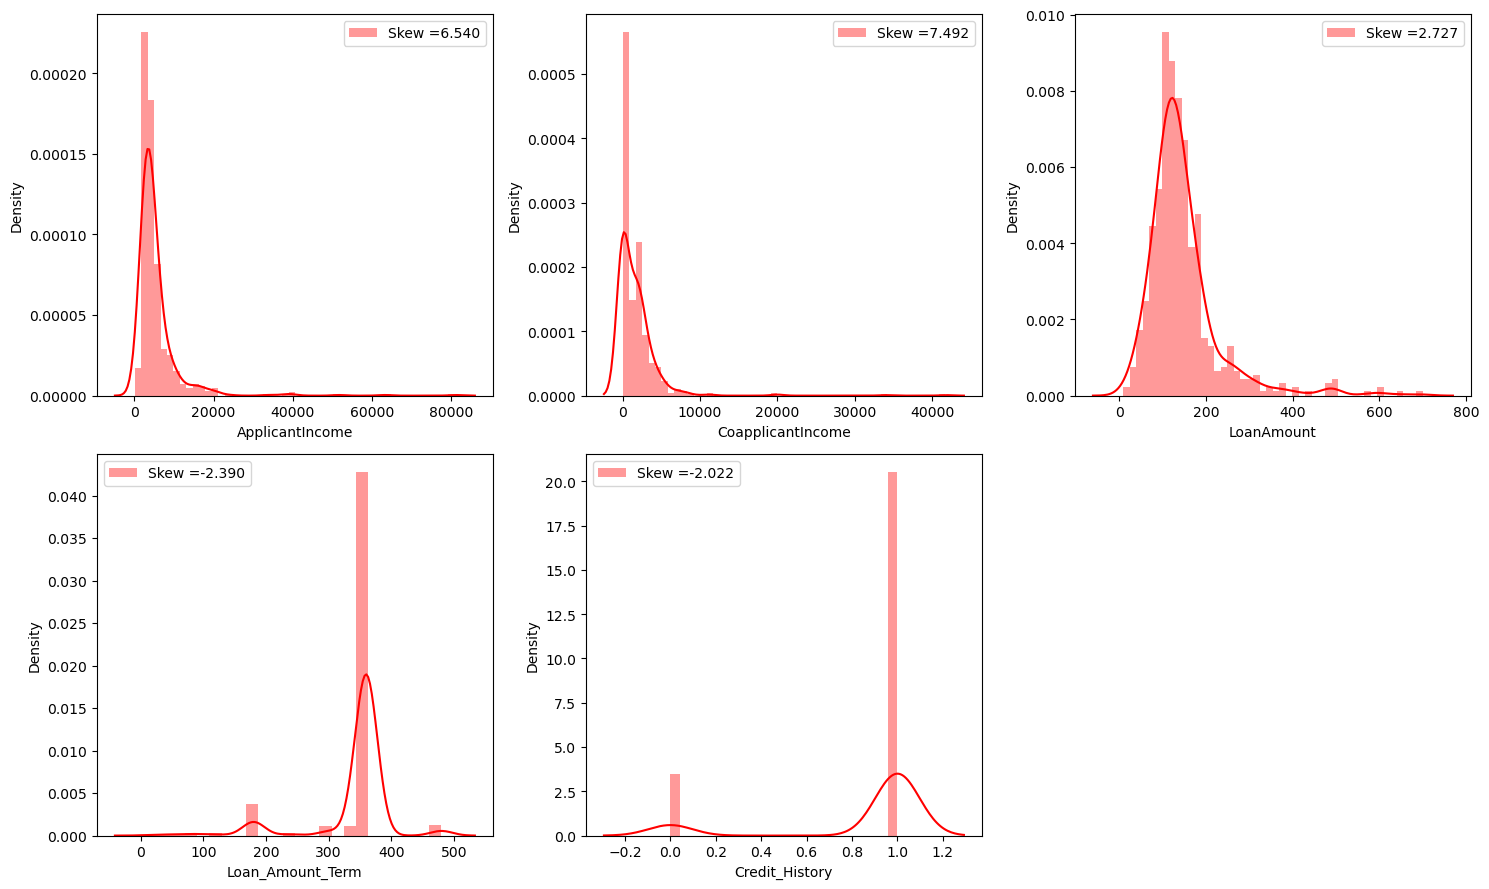

In [35]:
# Distribution plot and skewness
plt.figure(figsize=(15,9))
c=1
for i in con:
    plt.subplot(2,3,c)
    skew= df[i].skew()
    sns.distplot(df[i], color='red', label= 'Skew =%.3f' %skew)
    plt.legend(loc='best')
    c+=1
    
plt.tight_layout()

In [36]:
df[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Target is imbalanced where Loan_Status 'Y' is majority.

Also it tells us that Most of the times Loans are approved.

#### Visualization

[Text(0, 0, '422'), Text(0, 0, '192')]

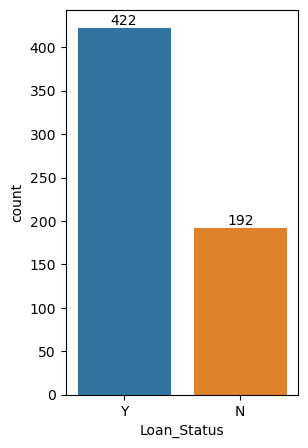

In [37]:
# target variable
plt.figure(figsize=(3,5))
ax= sns.countplot(x=df[target], data=df)
plt.bar_label(ax.containers[0])

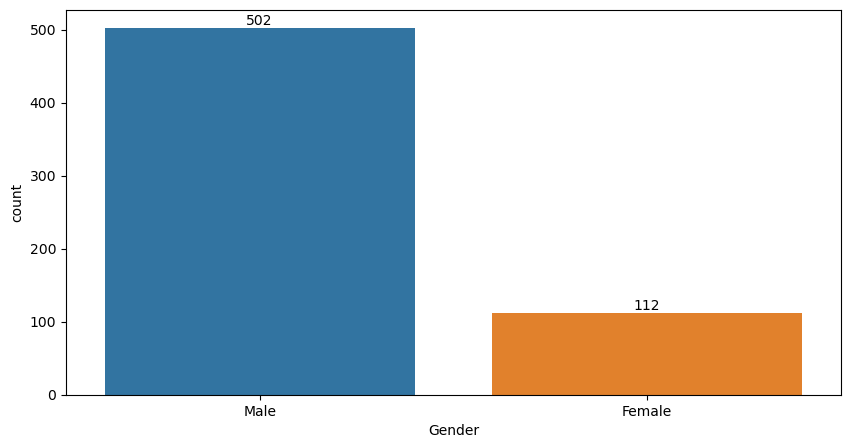

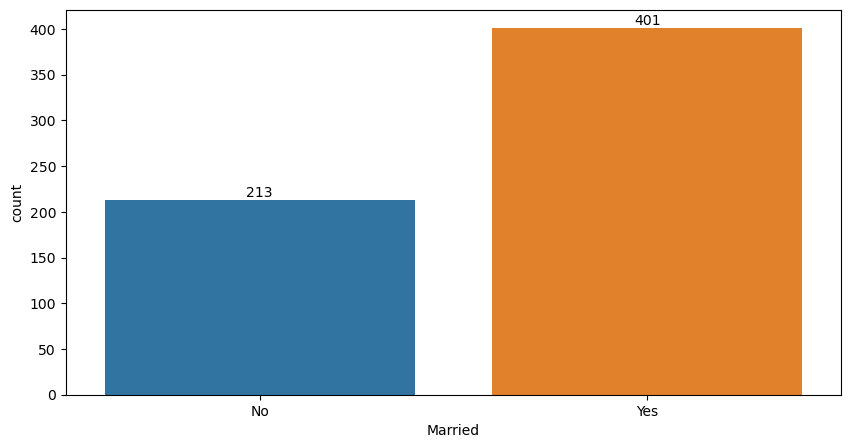

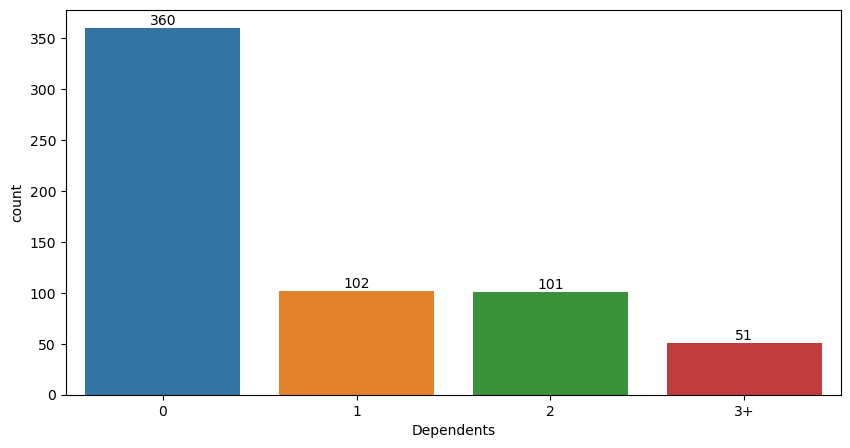

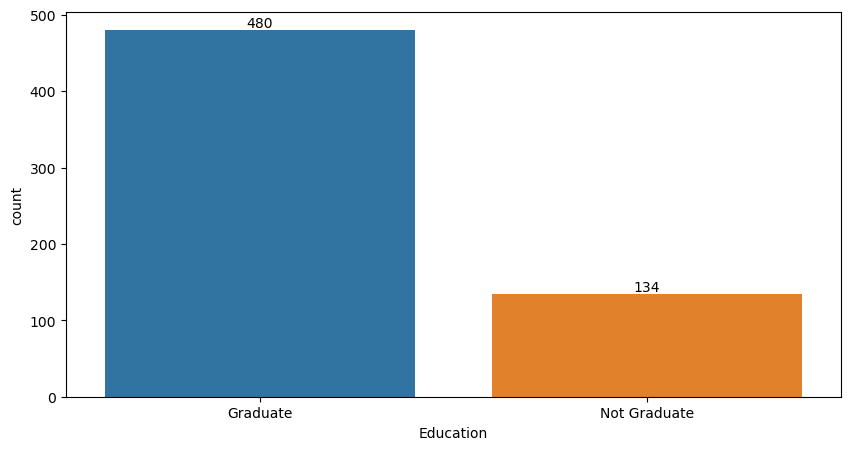

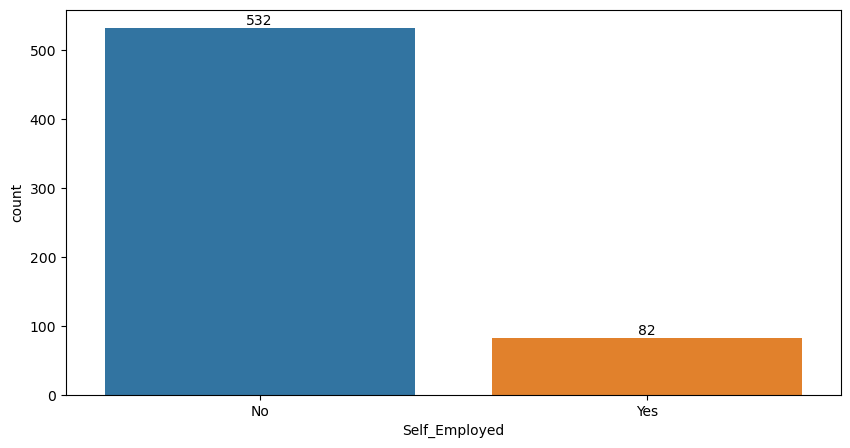

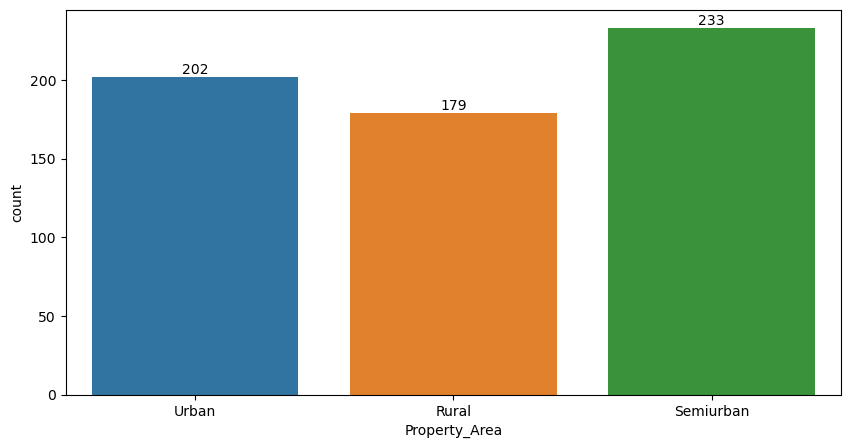

In [38]:
# categorical columns
for i in df[cat[:-1]]:
    plt.figure(figsize=(10,5))
    ax= sns.countplot(x=i, data=df)
    plt.bar_label(ax.containers[0])

Gender-
Males are more than four times in number than females.


Married-
Married ones are more in number than those who aren't married.


Dependents-
More than half of the applicants have no dependents while applicants with 1 and 2 dependents are almost equal. 51 applicants are with 3+ dependents


Education-
480 of the appliacnts are graduate while 134 are non-graduates.


Self_Employed-
only 82 of the applicants are Self_Employed


Property_Area-
233 applicants belongs to Semiurban. Urban and Rural counts are 202 and 179 respectively.

In [39]:
df[con].nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
dtype: int64

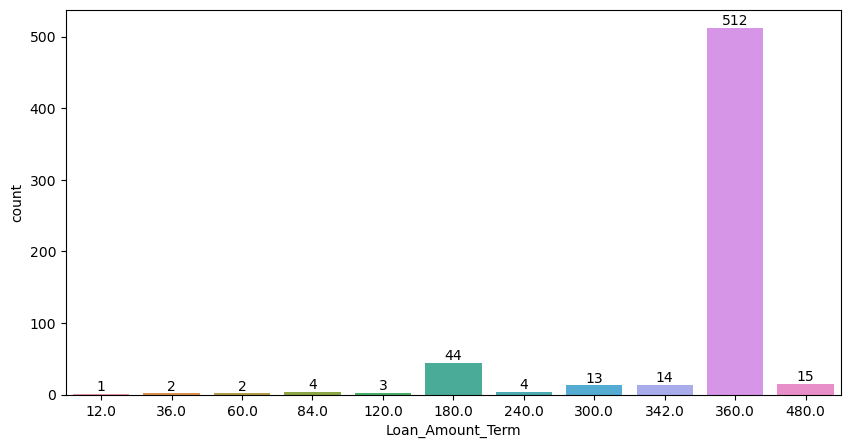

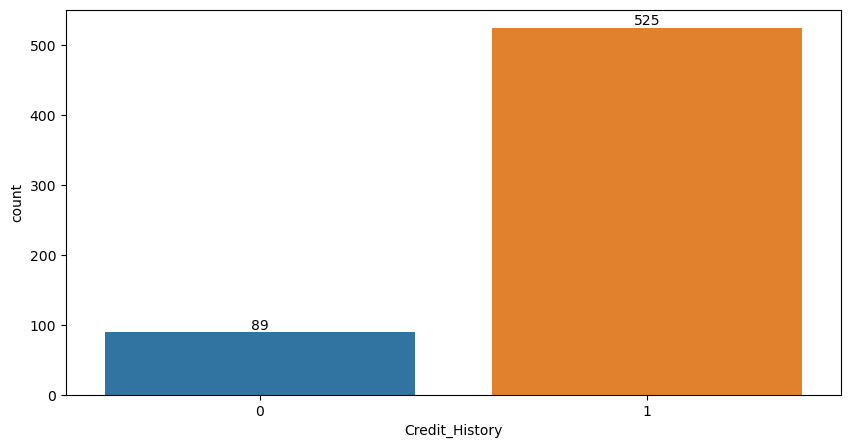

In [40]:
for i in con[-2:]:
    plt.figure(figsize=(10,5))
    ax=sns.countplot(x=df[i])
    
    plt.bar_label(ax.containers[0])

Only few applicants don't have any Credit_History (89 applicants).

In [41]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

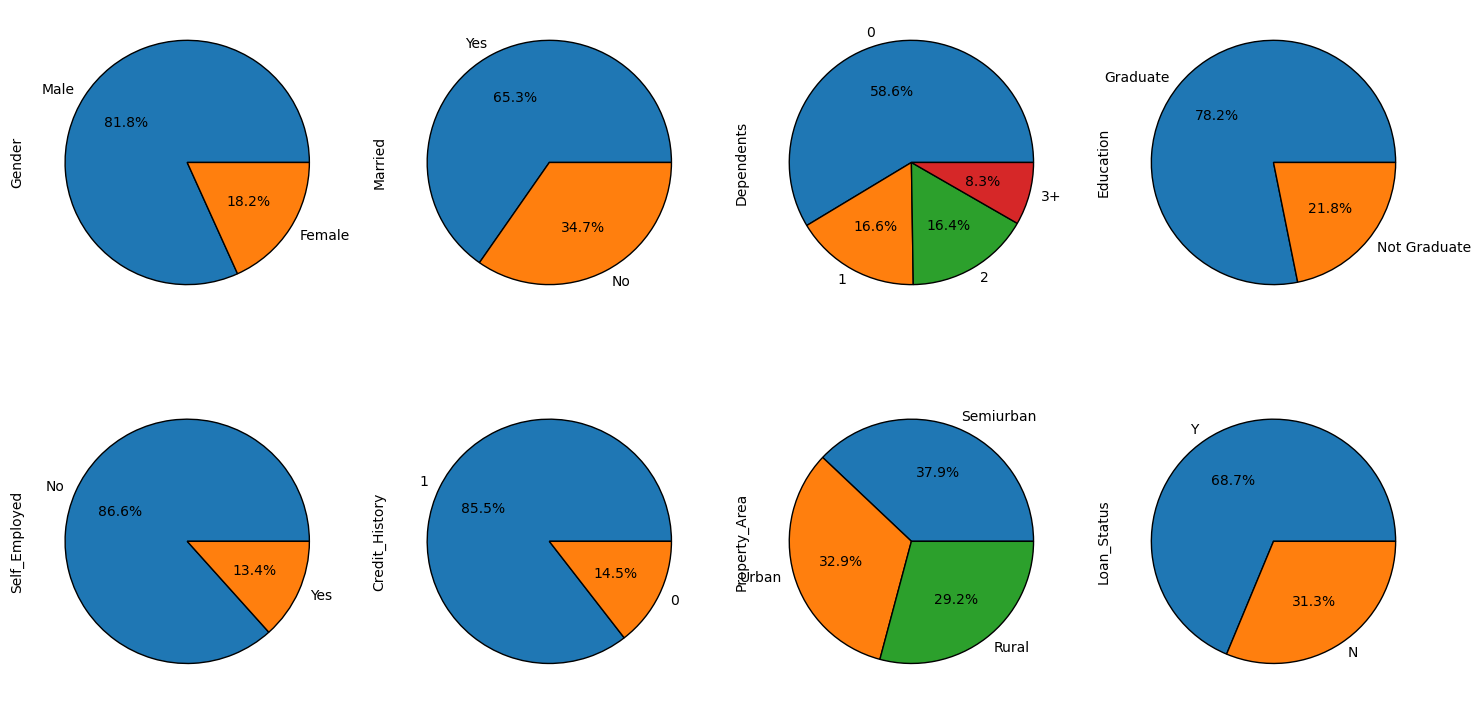

In [42]:
plt.figure(figsize=(15,8))
c=1
for i in df:
    if (df[i].nunique()<=10):
        plt.subplot(2,4,c)
        df[i].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = {"edgecolor" : "Black",'linewidth':1})


        c+=1
plt.tight_layout()

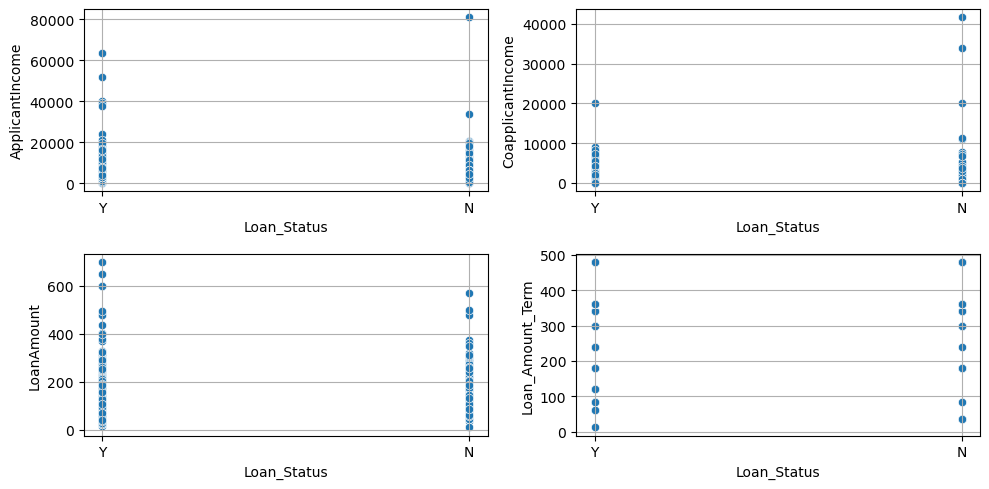

In [43]:
plt.figure(figsize=(10,5))
c=1
for i in con[:-1]:
    plt.subplot(2,2,c)
    ax=sns.scatterplot(y=df[i],x=df[target])
    c+=1
    plt.grid()
plt.tight_layout()

Generally, if Applicantincome is more, there is a high chance that the person will get the loan.

People with high Coapplicantincome generally got the application rejected.

There is no proper pattern between Loan_Amount_Term and Loan_Status

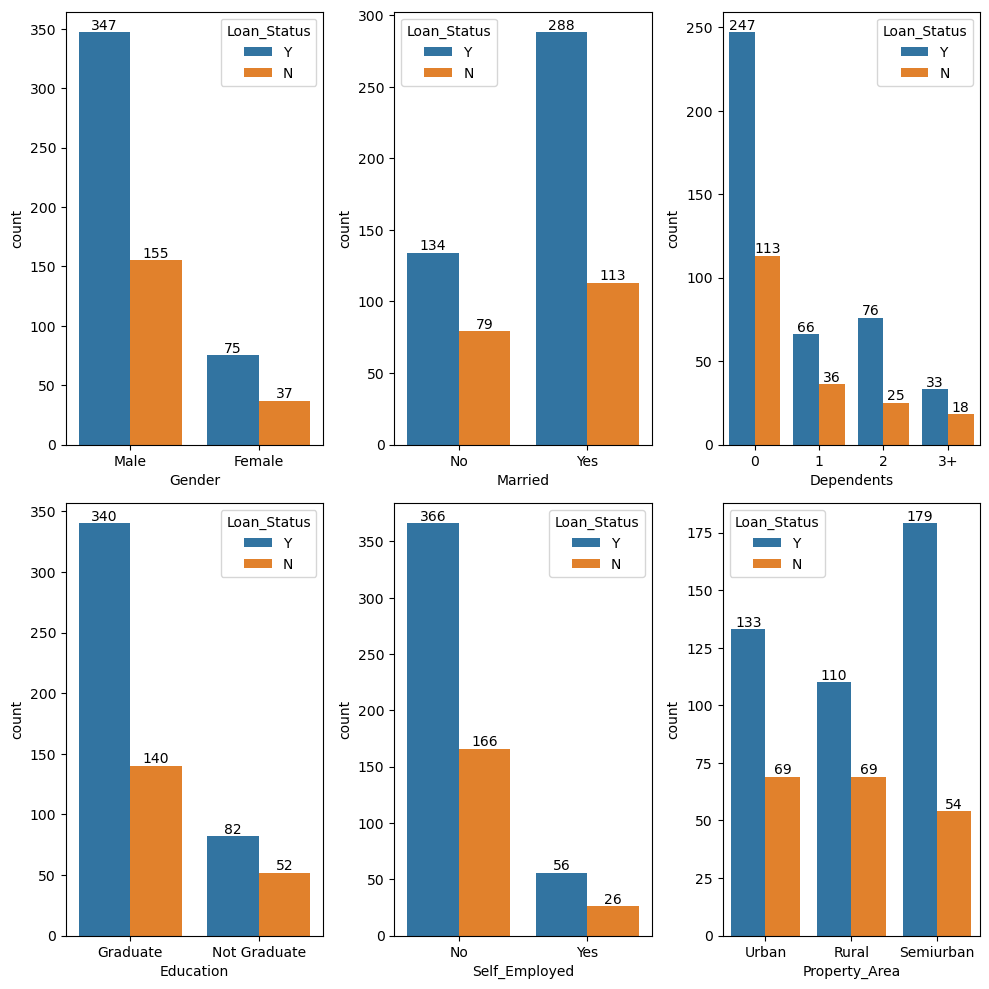

In [44]:
plt.figure(figsize=(10,10))
c=1
for i in cat[:-1]:
    plt.subplot(2,3,c)
    ax= sns.countplot(x=df[i], data=df, hue= target)
    plt.bar_label(ax.containers[0])    #for bar with hue 'Y'
    plt.bar_label(ax.containers[1])    #for bar with hue 'N'
    c+=1
plt.tight_layout()

We can see that Males got high approval and denial as well. The reason can be the high male counts as compared to females.

Married people have high approval rate.

The approval chance is high if appliacnt don't have any dependents.

Graduates and self employed got higher approvale rates.

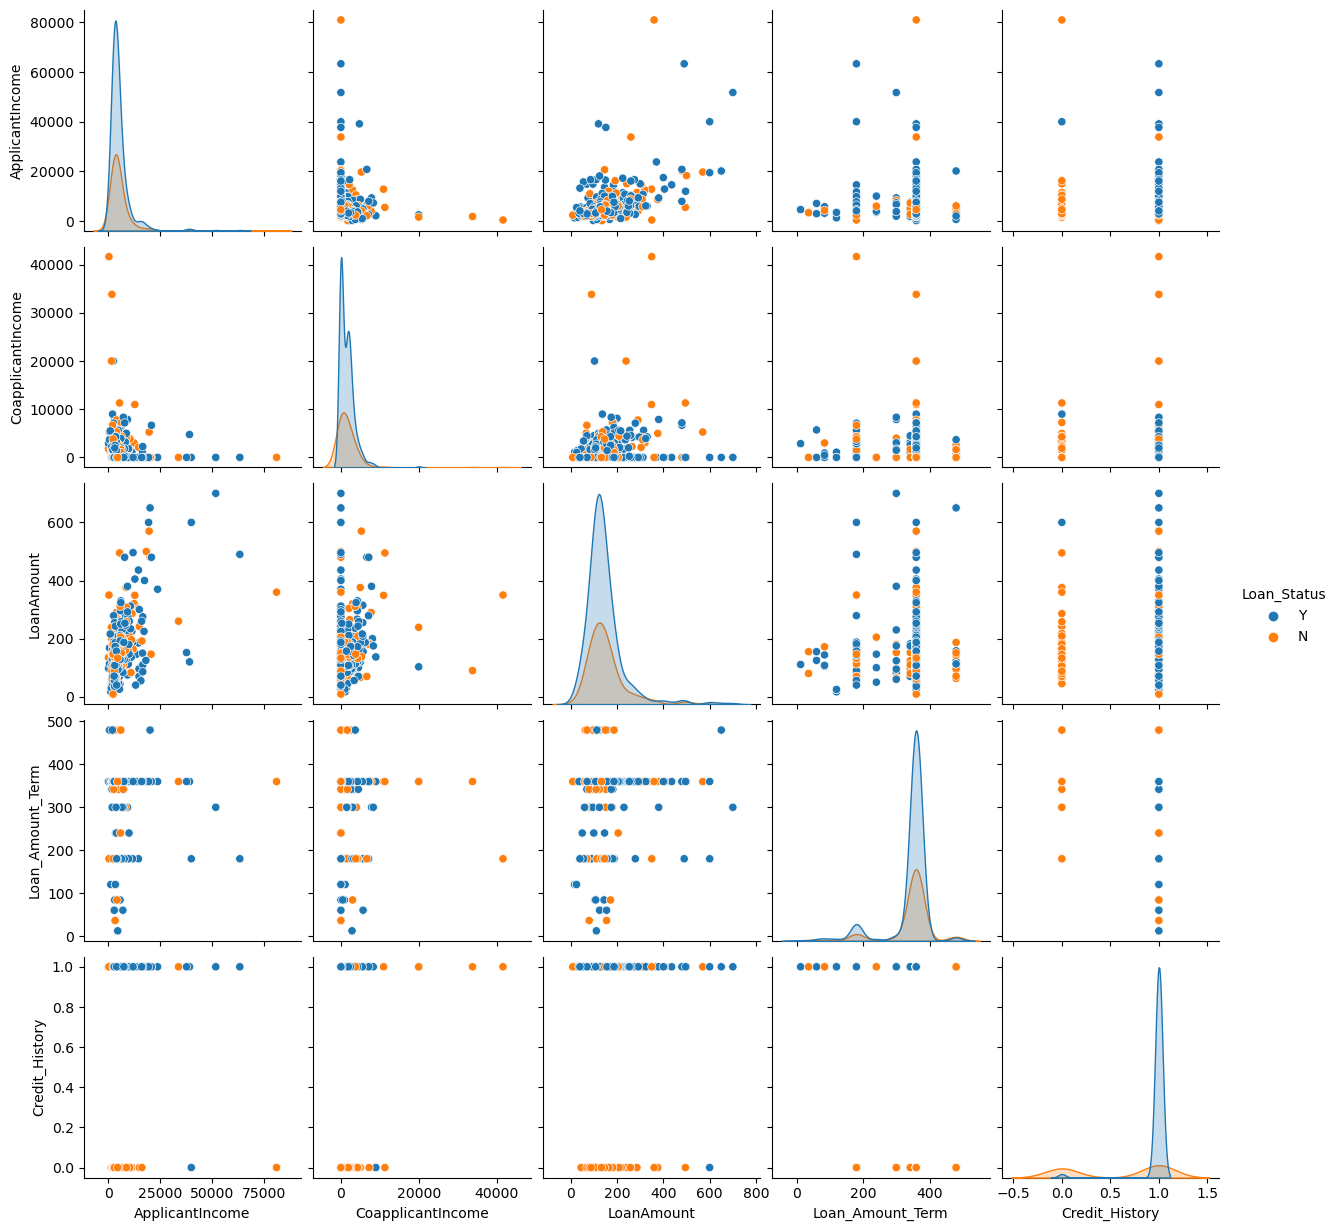

In [45]:
sns.pairplot(df, hue = target)

#### Correlation

In [46]:
# correlation of features with target
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


None of the columns are highly correlated.

Let's plot heatmap.

<AxesSubplot: >

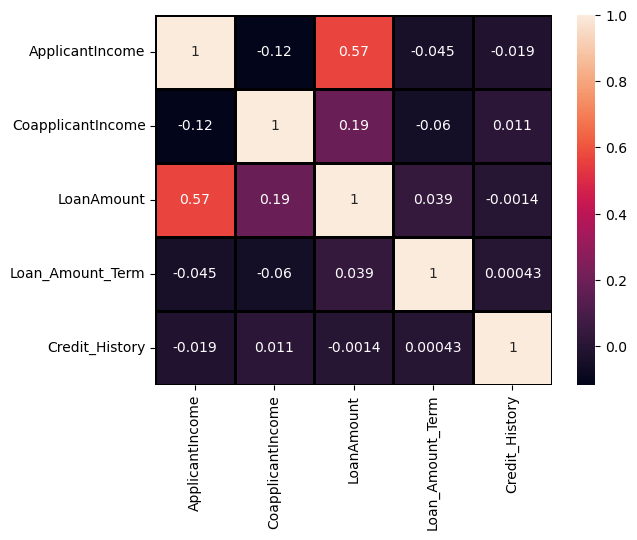

In [47]:
sns.heatmap(df.corr(), annot=True, linewidth=2, linecolor='Black')

#### Boxplot and outliers

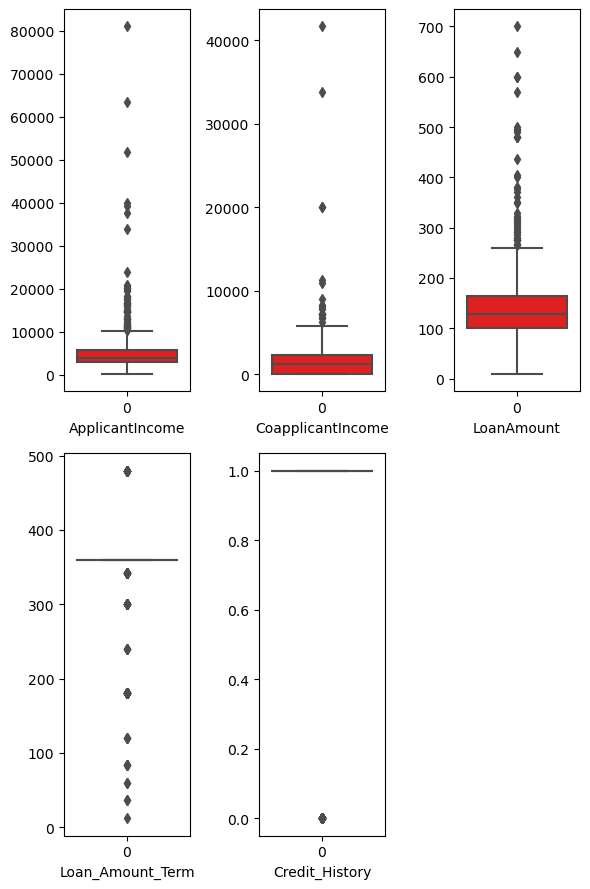

In [49]:
# Boxplot
plt.figure(figsize=(6,9))
c=1 
for i in con:
    plt.subplot(2,3,c)
    sns.boxplot(df[i], orient='v', color= 'red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

There are outliers in the dataset. 

In [84]:
# index of outliers by iqr
ind=[]
for i in con:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    upper= df[i].quantile(0.75) + (IQR * 1.5)
    lower= df[i].quantile(0.25) - (IQR * 1.5)
    
    ind.append(df[df[i]>upper].index)
    ind.append(df[df[i]<lower].index)
    
no=[j for i in range (len(ind)) for j in ind[i]]    #getting all elements from nested 'ind' list

# there are possibilities that several indexes are repeated in the list.
len(set(no))

226

In [85]:
#zscore
from scipy.stats import zscore

z = zscore(df[con])
t=np.abs(z)
# taking thresold value = 3

df2 = df[(t<3).all(axis = 1)]
df2.shape

(577, 12)

In [86]:
#Percentage of data loss
l=df.shape[0]-df2.shape[0]
print("By IQR, the percent of data loss is {0}".format(len(set(no))/df.shape[0]*100))
print()
print("By z-score, the percent of data loss is {0}".format(l/df.shape[0]*100))

By IQR, the percent of data loss is 36.807817589576544

By z-score, the percent of data loss is 6.026058631921824


##### The data loss by z-score is less compared to IQR method which is 6.02%.

In [87]:
df2=df2.reset_index(drop=True)

In [88]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
572,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1,Rural,Y
573,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1,Rural,Y
574,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1,Urban,Y
575,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1,Urban,Y


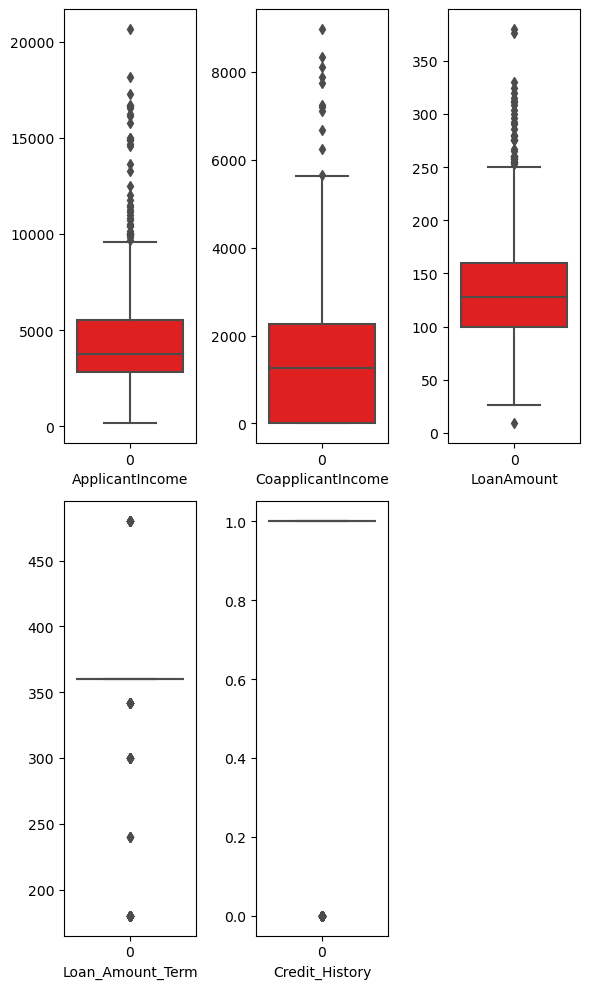

In [138]:
# Boxplot after zscore
plt.figure(figsize=(6,10))
c=1 
for i in con:
    plt.subplot(2,3,c)
    sns.boxplot(df2[i], orient='v', color= 'red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

#### Encoding

In [89]:
df2[cat].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

We will use label encoding for target variable and dummies for others

In [90]:
du=[]
for i in cat[:-1]:
    du.append(i)
du

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [91]:
x= pd.get_dummies(data = df2, columns = du)
x.shape

(577, 21)

In [92]:
df2[x.columns]= x

In [93]:
df2.shape

(577, 27)

In [95]:
df2=df2.drop(cat[:-1], axis=1)

In [96]:
df2.shape

(577, 21)

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2[target]= le.fit_transform(df2[target]) 
print("Done")

Done


In [100]:
df2['Loan_Status']=df2['Loan_Status']
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [141]:
df2[target]

0      1
1      0
2      1
3      1
4      1
      ..
572    1
573    1
574    1
575    1
576    0
Name: Loan_Status, Length: 577, dtype: int32

#### Splitting features and target variable

In [102]:
x= df2.drop(target, axis=1)
y=df2[target]

print(x.shape, y.shape)

(577, 20) (577,)


#### Collinearity and Multicollinearity

<AxesSubplot: >

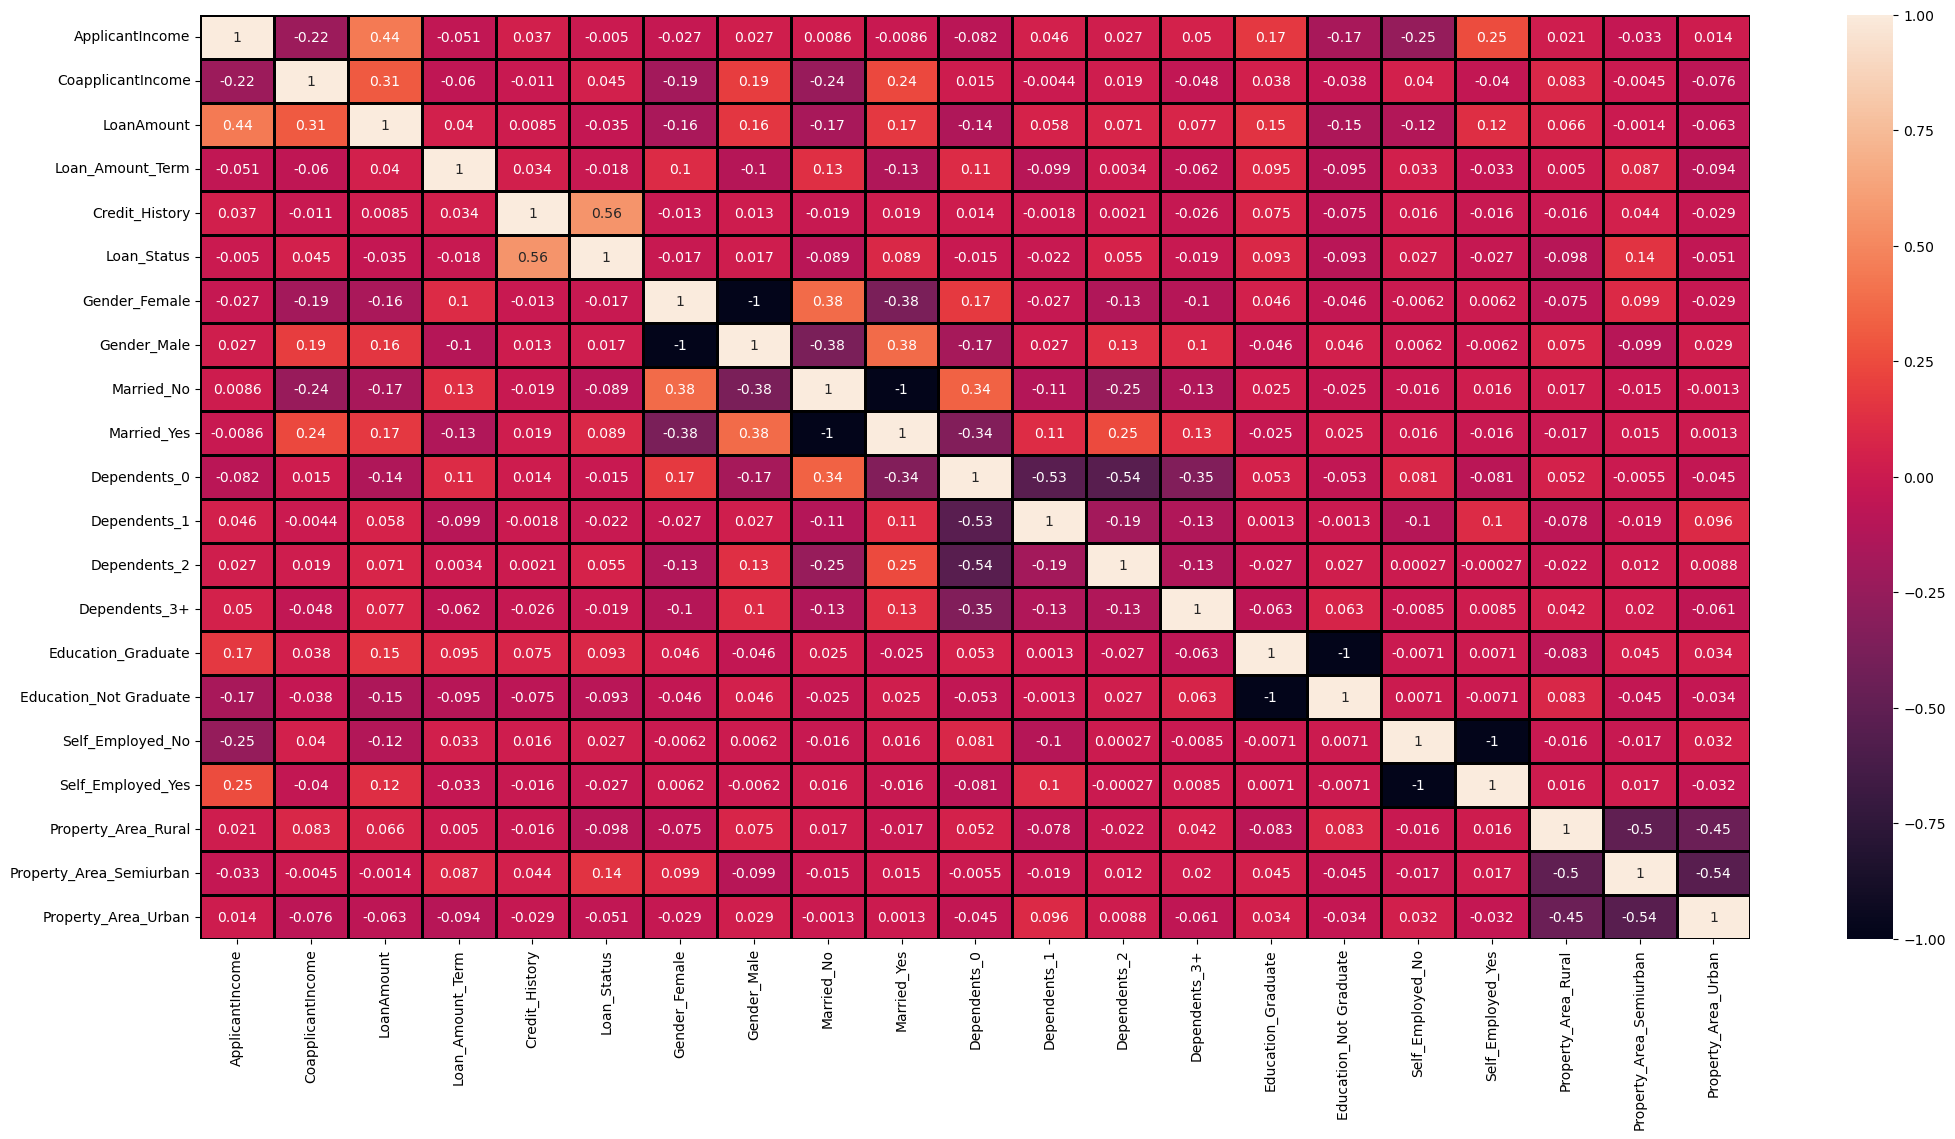

In [109]:
plt.figure(figsize=(25,12))
sns.heatmap(df2.corr(), annot=True, linecolor='Black', linewidth=2)

Only Credit_History is correlated with target variable.

Let's do further analysis using Variance Inflation Factor to get best features.

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
def vif_(x1):
    vif= pd.DataFrame()
    vif['Features']= x1.columns
    vif['VIF']= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    print(vif)

In [119]:
vif_(x)

                   Features       VIF
0           ApplicantIncome  1.634704
1         CoapplicantIncome  1.455747
2                LoanAmount  1.666452
3          Loan_Amount_Term  1.076504
4            Credit_History  1.011665
5             Gender_Female       inf
6               Gender_Male       inf
7                Married_No       inf
8               Married_Yes       inf
9              Dependents_0       inf
10             Dependents_1       inf
11             Dependents_2       inf
12            Dependents_3+       inf
13       Education_Graduate       inf
14   Education_Not Graduate       inf
15         Self_Employed_No       inf
16        Self_Employed_Yes       inf
17      Property_Area_Rural       inf
18  Property_Area_Semiurban       inf
19      Property_Area_Urban       inf


VIF score of every column is within range.

#### Oversampling using SMOTE

In [120]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x, y)
x.shape, y.shape

((796, 20), (796,))

#### Skewness

In [121]:
x[con].skew()

ApplicantIncome      2.218008
CoapplicantIncome    1.282954
LoanAmount           1.102282
Loan_Amount_Term    -1.900209
Credit_History      -0.919547
dtype: float64

we can see that data is skewed.

In [126]:
# PowerTransformation
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [127]:
x_pw = pw.fit_transform(x[con])
df3 = pd.DataFrame(x_pw, columns =con)

In [128]:
df3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.700828,-1.080030,0.328735,0.156136,0.641364
1,0.251866,0.799753,-0.015466,0.156136,0.641364
2,-0.527757,-1.080030,-1.511334,0.156136,0.641364
3,-0.803005,0.937282,-0.175582,0.156136,0.641364
4,0.747752,-1.080030,0.230777,0.156136,0.641364
...,...,...,...,...,...
791,-0.758690,0.848176,-0.369995,-0.852022,-1.559178
792,2.365904,0.872671,2.343484,0.156136,0.641364
793,-0.076020,0.815919,0.087031,0.156136,-1.559178
794,-0.325323,0.916499,0.102320,-0.272548,-1.559178


In [129]:
df3.skew()

ApplicantIncome      0.000522
CoapplicantIncome   -0.119921
LoanAmount           0.041881
Loan_Amount_Term     0.606134
Credit_History      -0.919547
dtype: float64

In [130]:
x[con]=df3
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.700828,-1.080030,0.328735,0.156136,0.641364,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.251866,0.799753,-0.015466,0.156136,0.641364,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.527757,-1.080030,-1.511334,0.156136,0.641364,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.803005,0.937282,-0.175582,0.156136,0.641364,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.747752,-1.080030,0.230777,0.156136,0.641364,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,-0.758690,0.848176,-0.369995,-0.852022,-1.559178,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
792,2.365904,0.872671,2.343484,0.156136,0.641364,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
793,-0.076020,0.815919,0.087031,0.156136,-1.559178,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
794,-0.325323,0.916499,0.102320,-0.272548,-1.559178,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


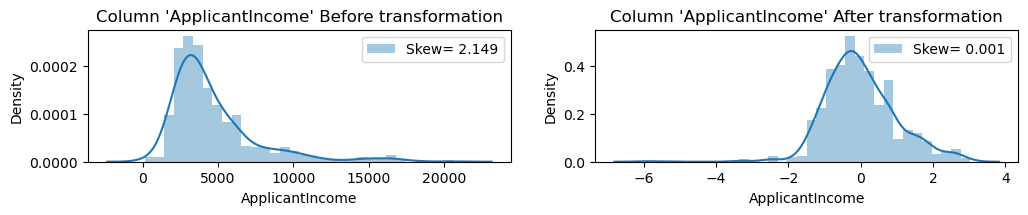

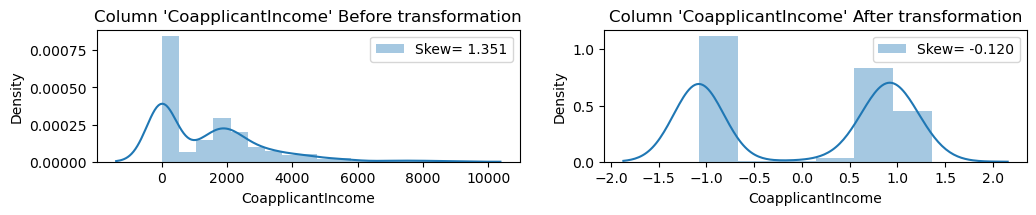

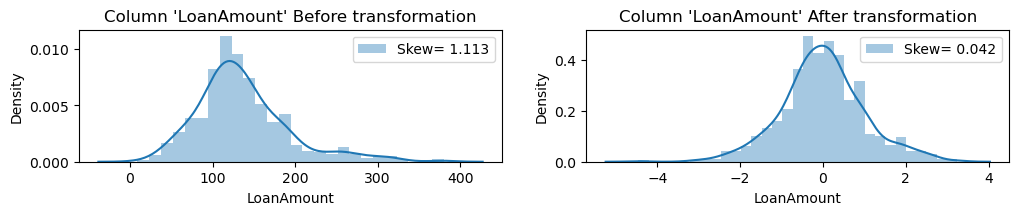

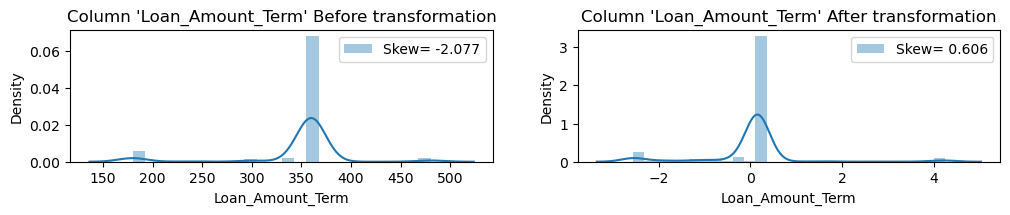

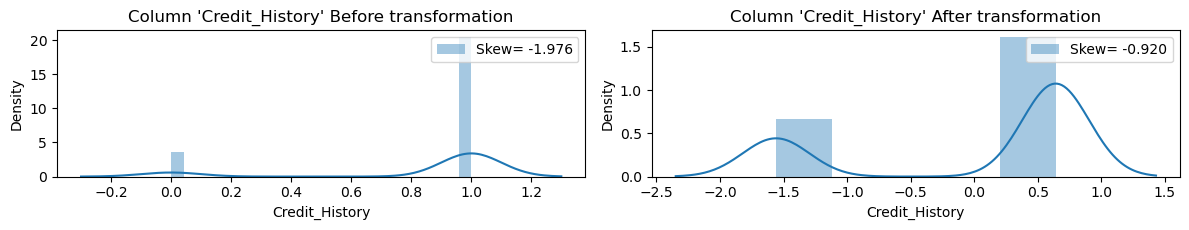

In [134]:
# Distribution plot and skewness
c=1
for i in x[con]:
    plt.figure(figsize=(12,12))
    
    plt.subplot(6,2,c)
    skew= df2[i].skew()
    sns.distplot(df2[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' Before transformation")
    
    plt.subplot(6,2,c+1)
    skew= x[i].skew()
    sns.distplot(x[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' After transformation")
    
    c+=2
    
plt.tight_layout()

#### Scaling datset

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [149]:
x = scaler.fit_transform(x)
x

array([[ 0.7008283 , -1.08003024,  0.32873546, ..., -0.58315293,
        -0.65113085,  1.63346343],
       [ 0.25186622,  0.79975297, -0.01546568, ...,  1.71481604,
        -0.65113085, -0.61219614],
       [-0.52775668, -1.08003024, -1.51133412, ..., -0.58315293,
        -0.65113085,  1.63346343],
       ...,
       [-0.07601966,  0.8159192 ,  0.08703051, ...,  1.71481604,
        -0.65113085, -0.61219614],
       [-0.32532337,  0.91649915,  0.10231955, ..., -0.58315293,
        -0.65113085, -0.61219614],
       [ 0.75845934, -1.08003024,  1.326255  , ..., -0.58315293,
        -0.65113085, -0.61219614]])

In [150]:
y

0      1
1      0
2      1
3      1
4      1
      ..
791    0
792    0
793    0
794    0
795    0
Name: Loan_Status, Length: 796, dtype: int32

#### MODEL

In [223]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [235]:
mdl, acc, rs, tr, cvsc= [],[],[],[],[]

# function to get best random_state
def prediction(model, ran):
    acc=0
    rs=0
    
    for i in range (ran):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=i, stratify=y)
            
        model.fit(x_train, y_train)     #train model
        y_tr= model.predict(x_train)    #prediction on train
        y_pred=model.predict(x_test)    #prediction on test
        
        pred_tr= accuracy_score(y_train, y_tr)    #R2 score of train
        pred_test= accuracy_score(y_test,y_pred)       #R2 score of test
    
    #sort randomstate at which train and test score difference is 1.
        margin=np.abs(round(pred_tr*100)-round(pred_test*100))
            
        if ((margin<=1) and (round(pred_test*100)>=75)):   
            print("at random state", i)
            print("Accuracy of train is ",pred_tr*100)
            print("Accuracy of test is ",pred_test*100)
            print("-x"*20)
            print()            
    
    print("Best Random_states sorted.")

    
# function to get score at the best random_state
def final(model, best_rs):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=best_rs, stratify=y)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test
    
    pred_tr= accuracy_score(y_train, y_tr)    # score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test
    
    print("at random state", best_rs)
    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
          
    #saving the data
    tr.append(pred_tr)
    acc.append(pred_test)
    rs.append(best_rs)
    


def cv_score(model, x, y):    # cross val score of the model
    cvsco=0
    for val in range(2,15):
        cv = cross_val_score(model, x, y, cv = val).mean()
        print('cross_val_score', cv*100,'at cv =', val)
        if cvsco<cv*100:
            cvsco=cv*100
    cvsc.append(cvsco)        

#### Linear Regression

In [236]:
lr= LogisticRegression()
prediction(lr, 50)

at random state 1
Accuracy of train is  86.4321608040201
Accuracy of test is  87.43718592964824
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  87.26968174204355
Accuracy of test is  85.92964824120602
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 4
Accuracy of train is  86.4321608040201
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  86.76716917922947
Accuracy of test is  86.4321608040201
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  86.09715242881072
Accuracy of test is  85.92964824120602
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  86.26465661641541
Accuracy of test is  85.92964824120602
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 11
Accuracy of train is  86.26465661641541
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 14
Accuracy o

Best accuracy is at random_state 6

In [237]:
#final metrics
final(lr,6)
mdl.append("LogisticRegression")

at random state 6
Accuracy of train is  86.76716917922947
Accuracy of test is  86.4321608040201

Confusion Matrix
[[75 25]
 [ 2 97]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       100
           1       0.80      0.98      0.88        99

    accuracy                           0.86       199
   macro avg       0.88      0.86      0.86       199
weighted avg       0.89      0.86      0.86       199



In [238]:
cv_score(lr,x,y)

cross_val_score 78.01507537688443 at cv = 2
cross_val_score 83.81094245046579 at cv = 3
cross_val_score 84.92462311557789 at cv = 4
cross_val_score 85.44732704402514 at cv = 5
cross_val_score 85.70764031290348 at cv = 6
cross_val_score 85.58010069421341 at cv = 7
cross_val_score 85.98611111111111 at cv = 8
cross_val_score 85.75076608784475 at cv = 9
cross_val_score 85.98734177215191 at cv = 10
cross_val_score 85.87588210875882 at cv = 11
cross_val_score 85.6267902909694 at cv = 12
cross_val_score 85.99235243867714 at cv = 13
cross_val_score 85.83064804869315 at cv = 14


#### DecisionTreeClassifier

In [239]:
dt=DecisionTreeClassifier()
prediction(dt,200)

Best Random_states sorted.


DecisionTree is not feasible.
In such case we will go with any random state and check the metrics.

In [240]:
#final metrics
final(dt,6)
mdl.append("DecisionTreeClassifier")

at random state 6
Accuracy of train is  100.0
Accuracy of test is  78.89447236180904

Confusion Matrix
[[75 25]
 [17 82]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.77      0.83      0.80        99

    accuracy                           0.79       199
   macro avg       0.79      0.79      0.79       199
weighted avg       0.79      0.79      0.79       199



In [241]:
cv_score(dt,x,y)

cross_val_score 73.36683417085428 at cv = 2
cross_val_score 78.02808909065115 at cv = 3
cross_val_score 76.88442211055276 at cv = 4
cross_val_score 77.77672955974843 at cv = 5
cross_val_score 80.29258752942962 at cv = 6
cross_val_score 76.77933772484309 at cv = 7
cross_val_score 80.56186868686868 at cv = 8
cross_val_score 79.69725343320849 at cv = 9
cross_val_score 79.3006329113924 at cv = 10
cross_val_score 80.20790092707901 at cv = 11
cross_val_score 79.83943916779737 at cv = 12
cross_val_score 79.21124354228533 at cv = 13
cross_val_score 79.27855352667382 at cv = 14


#### RandomForestClassifier

In [242]:
rf=RandomForestClassifier()
prediction(rf,20)

Best Random_states sorted.


RandomForest is also not feasible

In [243]:
#final metrics
final(rf,6)
mdl.append("RandomForestClassifier")

at random state 6
Accuracy of train is  100.0
Accuracy of test is  86.93467336683418

Confusion Matrix
[[79 21]
 [ 5 94]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       100
           1       0.82      0.95      0.88        99

    accuracy                           0.87       199
   macro avg       0.88      0.87      0.87       199
weighted avg       0.88      0.87      0.87       199



In [244]:
cv_score(rf,x,y)

cross_val_score 80.27638190954774 at cv = 2
cross_val_score 82.29961696694566 at cv = 3
cross_val_score 83.16582914572864 at cv = 4
cross_val_score 83.43474842767297 at cv = 5
cross_val_score 84.9472165261639 at cv = 6
cross_val_score 84.69514494200102 at cv = 7
cross_val_score 85.09469696969697 at cv = 8
cross_val_score 85.22727272727273 at cv = 9
cross_val_score 84.72310126582278 at cv = 10
cross_val_score 85.2411097274111 at cv = 11
cross_val_score 85.10854816824965 at cv = 12
cross_val_score 85.23369808404182 at cv = 13
cross_val_score 85.07205513784461 at cv = 14


#### KNeighborsClassifier

In [247]:
knn= KNeighborsClassifier()
prediction(knn,100)

at random state 7
Accuracy of train is  84.7571189279732
Accuracy of test is  83.91959798994975
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 38
Accuracy of train is  84.25460636515912
Accuracy of test is  82.91457286432161
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 92
Accuracy of train is  83.75209380234506
Accuracy of test is  83.91959798994975
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 94
Accuracy of train is  83.58458961474037
Accuracy of test is  83.41708542713567
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Best Random_states sorted.


Best accuracy is at random_state 7

In [248]:
#final metrics on any random_state
final(knn,7)
mdl.append("KNeighborsClassifier")

at random state 7
Accuracy of train is  84.7571189279732
Accuracy of test is  83.91959798994975

Confusion Matrix
[[71 28]
 [ 4 96]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.72      0.82        99
           1       0.77      0.96      0.86       100

    accuracy                           0.84       199
   macro avg       0.86      0.84      0.84       199
weighted avg       0.86      0.84      0.84       199



In [249]:
cv_score(knn,x,y)

cross_val_score 69.84924623115577 at cv = 2
cross_val_score 74.38974795479264 at cv = 3
cross_val_score 77.51256281407035 at cv = 4
cross_val_score 76.52987421383648 at cv = 5
cross_val_score 76.66419837472468 at cv = 6
cross_val_score 77.92046487901169 at cv = 7
cross_val_score 77.44949494949496 at cv = 8
cross_val_score 77.34791737600726 at cv = 9
cross_val_score 78.07911392405063 at cv = 10
cross_val_score 78.46962778469627 at cv = 11
cross_val_score 77.96246042514699 at cv = 12
cross_val_score 78.08038075092544 at cv = 13
cross_val_score 77.92696025778733 at cv = 14


#### GaussianNB

In [250]:
gnb= GaussianNB()
prediction(gnb,100)

at random state 0
Accuracy of train is  84.08710217755444
Accuracy of test is  84.92462311557789
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  84.25460636515912
Accuracy of test is  83.41708542713567
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 4
Accuracy of train is  85.09212730318258
Accuracy of test is  84.92462311557789
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  84.42211055276381
Accuracy of test is  83.91959798994975
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  84.08710217755444
Accuracy of test is  84.42211055276381
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 11
Accuracy of train is  84.25460636515912
Accuracy of test is  84.92462311557789
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 12
Accuracy of train is  83.41708542713567
Accuracy of test is  81.90954773869346
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 13
Accura

Best random state is at 69

In [251]:
final(gnb,69)
mdl.append("GaussianNB")

at random state 69
Accuracy of train is  84.92462311557789
Accuracy of test is  84.92462311557789

Confusion Matrix
[[73 27]
 [ 3 96]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       100
           1       0.78      0.97      0.86        99

    accuracy                           0.85       199
   macro avg       0.87      0.85      0.85       199
weighted avg       0.87      0.85      0.85       199



In [252]:
cv_score(gnb,x,y)

cross_val_score 64.69849246231156 at cv = 2
cross_val_score 79.66189057549535 at cv = 3
cross_val_score 80.90452261306534 at cv = 4
cross_val_score 82.0503144654088 at cv = 5
cross_val_score 82.17228677754993 at cv = 6
cross_val_score 82.04693148801206 at cv = 7
cross_val_score 82.69570707070707 at cv = 8
cross_val_score 82.58852570650323 at cv = 9
cross_val_score 83.45094936708861 at cv = 10
cross_val_score 82.8421198284212 at cv = 11
cross_val_score 83.21837780793004 at cv = 12
cross_val_score 83.84452670544685 at cv = 13
cross_val_score 83.43179377013963 at cv = 14


#### AdaBoostClassifier

In [253]:
adb= AdaBoostClassifier()
prediction(adb,200)

at random state 13
Accuracy of train is  85.92964824120602
Accuracy of test is  86.4321608040201
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 20
Accuracy of train is  86.26465661641541
Accuracy of test is  85.42713567839196
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 21
Accuracy of train is  86.09715242881072
Accuracy of test is  86.4321608040201
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 27
Accuracy of train is  87.77219430485762
Accuracy of test is  87.43718592964824
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 37
Accuracy of train is  87.60469011725294
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 38
Accuracy of train is  85.42713567839196
Accuracy of test is  83.91959798994975
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 66
Accuracy of train is  86.76716917922947
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 73
Acc

Best random_state is at 27.

In [254]:
#final metrics on any random_state
final(adb,27)
mdl.append("AdaBoost")

at random state 27
Accuracy of train is  87.77219430485762
Accuracy of test is  87.43718592964824

Confusion Matrix
[[79 20]
 [ 5 95]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        99
           1       0.83      0.95      0.88       100

    accuracy                           0.87       199
   macro avg       0.88      0.87      0.87       199
weighted avg       0.88      0.87      0.87       199



In [255]:
cv_score(adb,x,y)

cross_val_score 72.73869346733667 at cv = 2
cross_val_score 80.5376649170095 at cv = 3
cross_val_score 81.53266331658291 at cv = 4
cross_val_score 81.5503144654088 at cv = 5
cross_val_score 82.0593149540518 at cv = 6
cross_val_score 83.56732539312884 at cv = 7
cross_val_score 83.34343434343434 at cv = 8
cross_val_score 82.85381908977415 at cv = 9
cross_val_score 82.9604430379747 at cv = 10
cross_val_score 83.36100733361008 at cv = 11
cross_val_score 83.61412633800693 at cv = 12
cross_val_score 83.73062685595738 at cv = 13
cross_val_score 84.31793770139635 at cv = 14


#### SVC

In [256]:
svc = SVC()
prediction(svc,100)

at random state 0
Accuracy of train is  86.76716917922947
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 1
Accuracy of train is  87.77219430485762
Accuracy of test is  87.43718592964824
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 4
Accuracy of train is  87.26968174204355
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 11
Accuracy of train is  87.26968174204355
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 13
Accuracy of train is  88.107202680067
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 16
Accuracy of train is  87.60469011725294
Accuracy of test is  87.93969849246231
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 21
Accuracy of train is  87.77219430485762
Accuracy of test is  86.93467336683418
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 23
Accura

Best random_state is at 47.

In [257]:
final(svc,47)
mdl.append("SVC")

at random state 47
Accuracy of train is  88.107202680067
Accuracy of test is  87.43718592964824

Confusion Matrix
[[76 23]
 [ 2 98]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        99
           1       0.81      0.98      0.89       100

    accuracy                           0.87       199
   macro avg       0.89      0.87      0.87       199
weighted avg       0.89      0.87      0.87       199



In [258]:
cv_score(svc,x,y)

cross_val_score 73.24120603015075 at cv = 2
cross_val_score 82.43060481392158 at cv = 3
cross_val_score 84.2964824120603 at cv = 4
cross_val_score 84.81839622641509 at cv = 5
cross_val_score 85.20258980785296 at cv = 6
cross_val_score 85.4547874110054 at cv = 7
cross_val_score 85.48232323232324 at cv = 8
cross_val_score 85.62450346158211 at cv = 9
cross_val_score 85.35759493670886 at cv = 10
cross_val_score 85.62335685623356 at cv = 11
cross_val_score 85.75116840042213 at cv = 12
cross_val_score 85.61811007606882 at cv = 13
cross_val_score 85.70533476548515 at cv = 14


#### Model Summary

In [259]:
pd.DataFrame({"Model name": mdl, "Random_state":rs, "Train_Accuracy": tr, "Test_Accuracy": acc, "CV_score": cvsc})

,Model name,Random_state,Train_Accuracy,Test_Accuracy,CV_score
0,LogisticRegression,6,0.867672,0.864322,85.992352
1,DecisionTreeClassifier,6,1.000000,0.788945,80.561869
2,RandomForestClassifier,6,1.000000,0.869347,85.241110
3,KNeighborsClassifier,7,0.847571,0.839196,78.469628
4,GaussianNB,69,0.849246,0.849246,83.844527
5,AdaBoost,27,0.877722,0.874372,84.317938
6,SVC,47,0.881072,0.874372,85.751168


From the above data, we can see that LogisticRegression have better metrics.

#### Hyperparameter Tunning

In [260]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [261]:
param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
            'multi_class' : ['auto', 'ovr', 'multinomial'],
             'tol': [.0001, .0002, .0003, .0004]}

grid = GridSearchCV(lr, param_grid=param)
grid.fit(x, y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.0002, 0.0003, 0.0004]})

In [262]:
# getting best parameters
grid.best_params_

{'multi_class': 'auto',
 'penalty': 'none',
 'solver': 'newton-cg',
 'tol': 0.0001}

In [263]:
lrht=LogisticRegression(multi_class='auto',  penalty = 'none', solver = 'newton-cg',tol= 0.0001, n_jobs=-1)

In [264]:
model= lrht
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=6, stratify=y)
    
model.fit(x_train, y_train)     #train model
y_tr= model.predict(x_train)    #prediction on train
y_pred=model.predict(x_test)    #prediction on test

pred_tr= accuracy_score(y_train, y_tr)    #score of train
pred_test= accuracy_score(y_test,y_pred)       #score of test

print("Accuracy of train is ",pred_tr*100)
print("Accuracy of test is ",pred_test*100)
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy of train is  86.76716917922947
Accuracy of test is  86.4321608040201

Confusion Matrix
[[75 25]
 [ 2 97]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       100
           1       0.80      0.98      0.88        99

    accuracy                           0.86       199
   macro avg       0.88      0.86      0.86       199
weighted avg       0.89      0.86      0.86       199



Even after Hyper_tunning, the accuracy is almost same.

we will stick with LogisticRegression before tunning.

In [265]:
model= lr
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=6, stratify=y)
    
model.fit(x_train, y_train)     #train model
y_tr= model.predict(x_train)    #prediction on train
y_pred=model.predict(x_test)    #prediction on test

pred_tr= accuracy_score(y_train, y_tr)    #score of train
pred_test= accuracy_score(y_test,y_pred)       #score of test

print("Accuracy of train is ",pred_tr*100)
print("Accuracy of test is ",pred_test*100)
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy of train is  86.76716917922947
Accuracy of test is  86.4321608040201

Confusion Matrix
[[75 25]
 [ 2 97]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       100
           1       0.80      0.98      0.88        99

    accuracy                           0.86       199
   macro avg       0.88      0.86      0.86       199
weighted avg       0.89      0.86      0.86       199



In [266]:
cross_val_score(lr, x, y, cv = 13).mean()

0.8599235243867714

#### AUC-ROC Curve

In [267]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [268]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

print("Threshold", threshold)
print("FPR", fpr)
print("TPR", tpr)

Threshold [2 1 0]
FPR [0.   0.25 1.  ]
TPR [0.         0.97979798 1.        ]


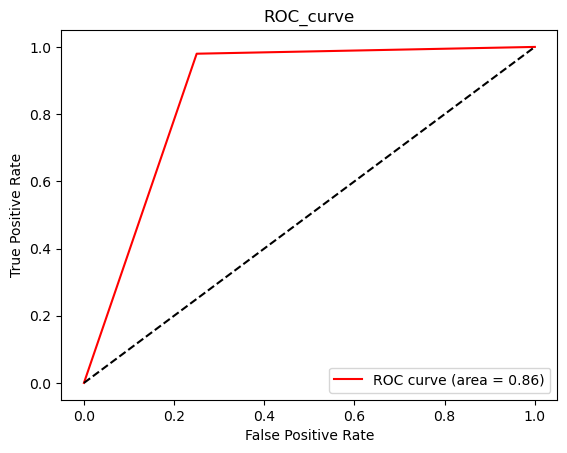

In [269]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,color='Red', label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="Black", linestyle="--")
plt.title("ROC_curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

plt.show()

#### Saving model

In [271]:
import pickle

#saving model
pickle.dump(lr, open('loan.pkl', 'wb'))

In [272]:
#Load model
file= pickle.load(open('loan.pkl', 'rb'))

In [273]:
file.predict(x_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0])

#### Conclusion

In [274]:
pd.set_option('display.max_rows', None)

In [275]:
end= pd.DataFrame({"y_test actual": y_test, "Predicted output": y_pred, "Predicted output pickle": file.predict(x_test),
             "Correct Prediction?": y_test==y_pred})
end.shape

(199, 4)

In [278]:
end.sample(50)

,y_test actual,Predicted output,Predicted output pickle,Correct Prediction?
591,0,0,0,True
89,1,1,1,True
80,0,1,1,False
423,0,1,1,False
592,0,0,0,True
269,0,1,1,False
558,1,1,1,True
282,1,1,1,True
25,1,1,1,True
281,1,1,1,True
